<p style="text-align:center">
    <a href="https://nbviewer.jupyter.org/github/twMr7/Python-Machine-Learning/blob/master/10-Coding_Project.ipynb">
        Open In Jupyter nbviewer
        <img style="float: center;" src="https://nbviewer.jupyter.org/static/img/nav_logo.svg" width="120" />
    </a>
</p>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/twMr7/Python-Machine-Learning/blob/master/10-Coding_Project.ipynb)

# 10. 程式開發專案 Coding Project

使用互動式的 Jupyter QtConsole 或 Notebook 介面，只適合用來作先期的實驗測試，離開這些介面後原有的函式、變數都不會被保留，當然也沒辦法被其他程式重複使用。 因此，有需要重複執行的功能就通常會把測試過有用的程式碼集合起來，寫成一個副檔名是 **“.py”** 的 **script** 檔案。

當 script 越寫越長，會開始需要將程式碼有結構化的組織起來。 除了常用的功能可以定義成函式以外，不同性質的函式可以分類拆成多個不同的 script 檔案。 而根據經驗，將函式的功能定義得越簡單，程式碼越不容易出錯，所以時常可以看到稍大型一點的專案會把一個檔案就只放一個函式。

+ [**10.1 模組（Modules）**](#modules)
+ [**10.2 套件（Packages）**](#packages)
+ [**10.3 迷你專案（An Example Mini-Project）**](#mini-project)
+ [**10.4 擴充專案功能練習（Expanding Project Features）**](#expanding-project)


<a id="modules"></a>

## 10.1 模組 Modules

在 Python 環境裡，一個 script 檔案就是一個模組，模組的名稱就是檔案的名稱（不包括 .py 的副檔名），模組裡面所有定義的函式及變數都需要透過 `import` 才能被另外一個 script 檔案使用。 Python 要 import 一個模組時，會先從內建模組開始搜尋起，找不到的話則依序尋找以下位置：

1. 叫用 `import` 的 script 檔案的相同目錄。
2. 系統環境變數 `PYTHONPATH` 的搜尋路徑清單。
3. 標準函式庫的目錄。
4. 副檔名為 `.pth` 的路徑設定檔。
5. 其他函式庫套件 `Lib/site-packages` 路徑。

並不是只有副檔名是 .py 的 script 檔才能 `import`，由名稱選取的套件（package）或模組（module），可以是以下幾種格式：
+ 副檔名是 **.py** 的程式碼文字檔。
+ 副檔名是 **.pyc** 的編譯過的 byte code 檔案。
+ 目錄名稱符合，而且存在套件必要的 `__init__.py` 檔。
+ 由 C++ 程式編譯來的，副檔名是 **.pyd** 的動態連結延伸模組
+ 副檔名是 **.zip** 的壓縮檔，**import** 時會自動解壓縮。


兩種輸入模組的語法可以使用 `import ...` 以及 `from ... import ...`，差別在於是否需要透過模組名稱來存取模組內的函式或變數名字。

### § `import` 陳述
```
import module1
import module2, module3
import module4 as m4
```
使用 `import` 的陳述，因為是整個模組物件直接輸入，必需透過模組名稱來存取模組內的函式或變數名字。 如：`module1.func1()`，`m4.func4()`，`module2.var2`。

### § `from` 陳述
```
from module1 import func1
from module2 import func2, var2
from module3 import *
from package import module4 as m4
```
使用 `from` 的陳述，因為指定了要從模組輸入的函式或變數名字，因此不需要再透過模組名稱來存取。 如： `func1()`，`func2()`，`var2`。

### § 模組 `import` 只會發生一次
由於一個模組的 `import` 是相當昂貴的操作，因此 `import` 只會在程式的執行生命週期內發生一次，輸入的模組只會有一份。


### § 模組的使用模式： `__name__` 以及 `__main__`

所有的模組都有一個內建的 `__name__` 屬性，在 Python 建立該模組時就會自動指定。
+ 如果 script 檔是被執行成最上層的程式，`__name__` 屬性會被指定為 `'__main__'`，例如：
    1. 在命令列下指令 `python somescript.py`，或
    2. 在命令列下指令 `python -m somescript.py`，或
    3. 在 *ipython* 或 *jupyter notebook* 執行 `%run somescript.py`。
+ 如果 script 檔是被 `import` 方式載入的，`__name__` 屬性會被指定為模組的名字。

除了原本就是設計為程式進入點的 script 以外，也時常可以看到純函式的模組包含這樣的檢查：
```
if __name__ == '__main__':
    main()
```

<a id="packages"></a>

## 10.2 套件 Packages

套件是利用檔案系統來結構化組織模組的方式。 以設計一個音訊處理的 `sound` 套件為例（以下範例來自 [Python官方文件](https://docs.python.org/3/tutorial/modules.html#packages) ），不同聲音檔案格式的讀寫，適合有各自獨立的模組來處理，然後集合成一個 `formats` 的子套件。 然後音訊資料又可以套用許多不同的特效及濾波，以下是一個可能的套件結構。

```
sound/                          套件最上層目錄
      __init__.py               初始化 sound 套件
      formats/                  子套件： 檔案格式轉換
              __init__.py
              wavread.py
              wavwrite.py
              mp3read.py
              mp3write.py
              ...
      effects/                  子套件： 特效
              __init__.py
              echo.py
              surround.py
              reverse.py
              ...
      filters/                  子套件： 濾波
              __init__.py
              equalizer.py
              vocoder.py
              karaoke.py
              ...

```

+ 屬於 Python 套件的目錄下，必須要存在一個 `__init__.py` 的檔案，內容可以是空的。
+ `import` 的階層按照目錄的階層安排，如 `from sound.effects import echo`。
+ 如果要提供 `from sound.effects import *` 的功能，在 "sound/effects/__init__.py" 檔案裡要有一行 `__all__ = ['echo', 'surround', 'reverse']`，否則只會有 `sound.effects` 被 import。
+ 子套件之間需要交互 import 時，可以使用絕對或相對路徑兩種方式：
    - **絕對方式** - 例如 `sound.filters.karaoke` 需要使用 `echo` 模組的功能，可以用 `from sound.effects import echo`。
    - **相對路徑** - 例如在 `surround` 模組裡，可以這樣用 `from . import echo`，`from .. import formats`，或 `from ..filters import equalizer`。
+ 套件如果要執行成上層應用程式，必須透過 `python -m somepackage` 的方式，且套件裡要存在 `__main__.py` 的模組作為程式的主要進入點。


<a id="mini-project"></a>

## 10.3 迷你專案（An Example Mini-Project）

編輯一個 script 儲存成 "***rotatepoint.py***" ，內容如以下 cell 中的程式碼。 第一行使用了 `%%writefile` magic 命令，執行該 cell 時就會將 cell 裡的程式碼存成檔案，手動複製程式碼到編輯器的話，可以忽略第一行。


In [1]:
%%writefile rotatepoint.py
from typing import Tuple
from math import cos, sin, radians

point2d = Tuple[float, float]

def rotate2d(point: point2d, degree: float) -> point2d:
    """rotate 2D point by specific degree
    """
    x, y = point[0], point[1]
    theta = radians(degree)
    new_x = x * cos(theta) - y * sin(theta)
    new_y = x * sin(theta) + y * cos(theta)
    return (new_x, new_y)


if __name__ == "__main__":
    import argparse
    # setup options
    parser = argparse.ArgumentParser(prog='rotatepoint', description='''
        rotatepoint read a 2D point and angle from command line arguments.
            The output is a point transformed by rotating specific degree.
        ''')
    parser.add_argument('-p', '--point', nargs=2, type=float,
        metavar=('X','Y'), required=True,
        help='''Specify a (x, y) coordinate poin.''')
    parser.add_argument('-a', '--angle', type=float, required=True,
        help='''Specify rotating angle in degree.''')
    
    # parse command line arguments
    args = parser.parse_args()

    new_point = rotate2d(args.point, args.angle)
    print(new_point)

Writing rotatepoint.py



### § 以 Script 方式執行

檔案生成後，可以在 notebook 使用 `%run` 來執行。


In [2]:
%run rotatepoint -h

usage: rotatepoint [-h] -p X Y -a ANGLE

rotatepoint read a 2D point and angle from command line arguments. The output is a point transformed by rotating specific degree.

optional arguments:
  -h, --help            show this help message and exit
  -p X Y, --point X Y   Specify a (x, y) coordinate poin.
  -a ANGLE, --angle ANGLE
                        Specify rotating angle in degree.


In [6]:
%run rotatepoint -p 3 5 -a 90

(-5.0, 3.0000000000000004)



### § 把模組當成函式庫 `import`

只需要該模組裡面的某些函式，`import` 進來不會去執行 `__name__ == "__main__"` 區段的程式碼。


In [5]:
from rotatepoint import rotate2d

# 呼叫函式
rotate2d((3, 5), 90)

(-5.0, 3.0000000000000004)

<a id="expanding-project"></a>

## 10.4 擴充專案功能練習（Expanding Project Features）

學習以下範例使用 `csv` 及 `argparse` 物件的方法，必要時查閱 Python 官網文件，以完成指定的功能。



### § CSV

+ [**`csv`**](https://docs.python.org/3/library/csv.html) 模組，Python 官網文件 (https://docs.python.org/3/library/csv.html)


In [2]:
# 隨機產生 N 個點資料，輸出成CSV格式
import csv
from random import randrange, random, sample

# csv 物件會自己處理換行，固定要加參數 newline=''
with open('points.csv', 'w', newline='') as csvfile:
    field_names = ['x', 'y']
    # 注意： 沒有 QUOTE_NONNUMERIC 的話，預設輸出文字沒有引號
    writer = csv.writer(csvfile, quoting=csv.QUOTE_NONNUMERIC)
    # write header
    writer.writerow(field_names)
    # random sample N points (N == 5)
    for _ in range(5):
        x, y = randrange(-100,100)+random(), randrange(-100,100)+random()
        writer.writerow([x, y])

In [3]:
# 讀入CSV格式檔案，使用csv物件解析每一筆資料
with open('points.csv', 'r', newline='') as csvfile:
    reader = csv.reader(csvfile, quoting=csv.QUOTE_NONNUMERIC)
    for row in reader:
        print(row)

['x', 'y']
[82.93172791107892, 48.90225839878033]
[-16.14561496387222, -42.060573887619334]
[-83.28140163536176, -65.0394205200153]
[-32.43098549252423, 80.10788082697725]
[84.96345212346213, 78.05944524112805]


In [5]:
# 在一次讀入CSV格式檔案，這次使用DictReader物件解析
# 將點資料 x, y 分別存成 list
X, Y = [], []
with open('points.csv', 'r', newline='') as csvfile:
    reader = csv.DictReader(csvfile, quoting=csv.QUOTE_NONNUMERIC)
    for row in reader:
        X.append(row['x'])
        Y.append(row['y'])

print(X)
print(Y)

[82.93172791107892, -16.14561496387222, -83.28140163536176, -32.43098549252423, 84.96345212346213]
[48.90225839878033, -42.060573887619334, -65.0394205200153, 80.10788082697725, 78.05944524112805]


In [7]:
# 載入繪圖工具
%matplotlib inline
import matplotlib.pyplot as plt

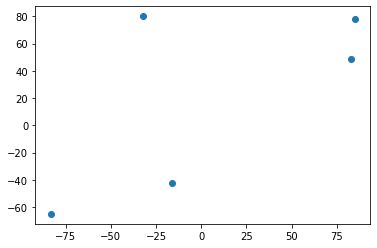

In [8]:
plt.plot(X, Y, 'o')

### § ArgParse

+ [**`argparse`**](https://docs.python.org/3/library/argparse.html) 模組，Python 官網文件 (https://docs.python.org/3/library/argparse.html)

使用引數（參數）解譯物件，固定步驟是：
1. `parser = argparse.ArgumentParser()` － 建構物件。
2. `parser.add_argument()` － 加入程式想要提供的引數選項。
3. `args = parser.parse_args()` － 解譯後的引數都在 args 屬性裡。


### § 作業練習

1. 使用 IDE（如 VSCode）開發，並學習如何使用 IDE 的除錯功能。
2. 【功能一】： 可接受參數指定 (1)產生 N 個隨機座標點及 (2)輸出檔名，但所有的點必須可連成凸多邊形（提示： 使用旋轉轉換），將隨機未排序的點輸出成CSV格式的指定檔名。
3. 【功能二】： 可接受參數指定 (1)輸入CSV檔檔名 (2)是否顯示座標及多邊形的繪圖，座標點讀取後計算多邊形的周長並在畫面輸出結果。
4. 【功能三】： 可接受參數指定讀入JSON檔案，其他所有參數都套用JSON檔案所設定的內容。